# Tensorflow Regression

In [146]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Dataprep'
modelloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Model'

import sys, random, gc

print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Code', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

# Import writer class from csv module
from csv import writer

import pandas as pd, numpy as np
from datetime import datetime

import random, time


In [5]:
 
import pytz

# Get the current UTC time
utc_now = datetime.now(pytz.utc)

# Convert it to local time
#local_tz = pytz.timezone('America/Los_Angeles')  # Replace with your timezone
local_tz = pytz.timezone('Asia/Kolkata')  # Set timezone to India (IST)
local_now = utc_now.astimezone(local_tz)

print(local_now)


2023-06-13 11:50:20.931393+05:30


In [11]:

DEBUG = True
seed = 1919

RUN_NB = False


In [147]:

todaydt = datetime.now().date()


In [7]:
pd.set_option('display.max_rows', 50);

In [8]:
pd.set_option('display.max_columns', 50);

In [9]:
pd.set_option('display.width', 200);

In [13]:

if RUN_NB:
    %run "C031_CONSOL_Main_Run in C040.ipynb"
    print()
    print()

    print('Finished running inline')

    print()
    print()
else:
    # Import the Base Dataset
    modeling_dataset_name = 'modeling_base_2023-06-13.csv'
    
    print(datetime.now(local_tz))
    df_modeling = pd.read_csv(f'{fileloc}/{modeling_dataset_name}')
    print(datetime.now(local_tz))
    # 5 Min Import-time
    
    print(df_modeling.shape)
    print()
    print(df_modeling.columns.values.tolist())


2023-06-13 11:53:15.415892+05:30
2023-06-13 11:58:02.867322+05:30
(725080, 204)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc_to_win', 'h_rand_all_plc_to_win', 'p_rand_all_plc_to_win', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_spee

In [14]:
print(df_modeling.shape)

(725080, 204)


In [15]:
print(df_modeling.columns.values.tolist())

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc_to_win', 'h_rand_all_plc_to_win', 'p_rand_all_plc_to_win', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_ran

In [16]:
#df_modeling = df_base.copy()

In [61]:

#print(pd.DataFrame(df_modeling.isna().sum()).transpose())


NameError: name 'df_modeling' is not defined

In [18]:

print(pd.DataFrame(df_modeling.dtypes).transpose)


<bound method DataFrame.transpose of                  0
@id_DOG      int64
DogName     object
y_runtime  float64
RaceId       int64
@id_RACE     int64
...            ...
dng_34       int64
dng_45       int64
dng_56       int64
dng_67       int64
dng_78       int64

[204 rows x 1 columns]>


In [19]:

df_modeling.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,Prizemoney,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,...,RaceName,dist300,dist350,dist400,dist450,dist500,dist600,dist700,firstrace,upgrade,downgrade,upg_87,upg_76,upg_65,upg_54,upg_43,upg_32,upg_21,dng_12,dng_23,dng_34,dng_45,dng_56,dng_67,dng_78
0,108390981,DOLLY DOES IT,26.43,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,80.0,92892,M Elphinstone,11.0,8,4,6.00,4,0,0,0.5,0.761335,2.0,0,1,5.0,...,GREAT NORTHERN,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,108390981,DOLLY DOES IT,26.40,629797242,629797242,452m,Grade 5,Devonport,2021-01-12,0.0,92892,M Elphinstone,7.0,7,5,6.00,5,0,0,0.5,1.958731,1.0,1,1,5.0,...,GREAT NORTHERN,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,108390981,DOLLY DOES IT,26.20,629797513,629797513,452m,Grade 5,Devonport,2021-01-19,1890.0,92892,M Elphinstone,7.0,7,1,5.25,1,1,1,0.5,0.906223,3.0,0,1,4.0,...,SUREPICK,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,108390981,DOLLY DOES IT,26.48,638810808,638810808,452m,Mixed 4/5 Heat,Devonport,2021-02-16,0.0,92892,M Elphinstone,7.0,8,7,10.50,7,0,0,0.5,0.712048,3.0,0,1,4.0,...,LADBROKES,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,108390981,DOLLY DOES IT,26.91,643554706,643554706,452m,Grade 4,Devonport,2021-03-02,0.0,92892,M Elphinstone,91.0,8,8,18.50,8,0,0,0.5,-0.423623,8.0,0,0,8.0,...,NEW RECRUIT 2012,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:

df_modeling.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,Prizemoney,TrainerId,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc_to_win,...,trnr_xr_fin_last2_pct_norm,dist300,dist350,dist400,dist450,dist500,dist600,dist700,firstrace,upgrade,downgrade,upg_87,upg_76,upg_65,upg_54,upg_43,upg_32,upg_21,dng_12,dng_23,dng_34,dng_45,dng_56,dng_67,dng_78
count,7.250800e+05,725080.000000,7.250800e+05,7.250800e+05,498861.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.0,725080.000000,725080.00000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,...,7.250800e+05,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000
mean,4.866356e+08,24.363969,7.640069e+08,7.640069e+08,441.621810,111702.449377,17.092809,7.347380,4.171696,6.396170,4.171696,0.138760,0.415892,0.5,0.498690,4.17369,0.138498,0.415493,4.033828,0.143678,0.433520,0.138498,0.019603,-0.032199,0.350124,...,-2.408849e-15,0.174417,0.145403,0.270938,0.175759,0.198210,0.026236,0.009029,0.042082,0.122159,0.102302,0.021447,0.017502,0.015056,0.036491,0.008354,0.003089,0.001917,0.001481,0.002109,0.006787,0.032725,0.000044,0.000033,0.000269
std,1.219313e+08,4.941794,7.786416e+07,7.786416e+07,2912.322446,78747.029834,21.284010,0.890034,2.163317,4.794569,2.163317,0.345696,0.492875,0.0,0.999065,2.16319,0.345422,0.492807,2.090421,0.350763,0.495561,0.345422,0.138633,1.203319,0.477009,...,9.276630e-01,0.379468,0.352507,0.444445,0.380615,0.398651,0.159836,0.094593,0.200777,0.327470,0.303045,0.144870,0.131131,0.121777,0.187509,0.091015,0.055496,0.043742,0.038458,0.045873,0.082102,0.177915,0.006643,0.005753,0.016397
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.000000,6418.000000,0.260000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.5,-4.007856,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,...,-2.474874e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.159944e+08,20.520000,6.985139e+08,6.985139e+08,0.000000,65438.000000,4.200000,7.000000,2.000000,2.530000,2.000000,0.000000,0.000000,0.5,-0.176363,2.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.874624e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.791464e+08,23.490000,7.654781e+08,7.654781e+08,65.000000,99808.000000,8.700000,8.000000,4.000000,5.500000,4.000000,0.000000,0.000000,0.5,0.497742,4.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.918096e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.620734e+08,26.990000,8.292900e+08,8.292900e+08,425.000000,125087.000000,21.000000,8.000000,6.000000,9.140000,6.000000,0.000000,1.000000,0.5,1.174129,6.00000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,6.617667e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [21]:

#10 Min Runtime

print(datetime.now(local_tz))

#df_modeling['year'] = df_modeling.apply(lambda x : pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').year , axis = 1 )
#df_modeling['qtr'] = df_modeling.apply(lambda x : pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').quarter , axis = 1 )

#df_modeling['yearqtr'] = df_modeling.apply(lambda x : pd.to_datetime(x.Event_Dt_x, format = '%Y-%m-%d').year*100 + pd.to_datetime(x.Event_Dt_x, format = '%Y-%m-%d').quarter , axis = 1 )
#df_modeling['yearmon'] = df_modeling.apply(lambda x : pd.to_datetime(x.Event_Dt_x, format = '%Y-%m-%d').year*100 + pd.to_datetime(x.Event_Dt_x, format = '%Y-%m-%d').month , axis = 1 )

# CHAT GPT suggestion
df_modeling['Event_Dt_dt'] = pd.to_datetime(df_modeling['Event_Dt'], format='%Y-%m-%d')
df_modeling['yearqtr'] = df_modeling['Event_Dt_dt'].dt.year * 100 + df_modeling['Event_Dt_dt'].dt.quarter
df_modeling['yearmon'] = df_modeling['Event_Dt_dt'].dt.year * 100 + df_modeling['Event_Dt_dt'].dt.month

print(datetime.now(local_tz))


2023-06-13 11:58:06.378804+05:30
2023-06-13 11:58:07.258200+05:30


In [22]:

print(df_modeling['yearqtr'].value_counts().sort_index())
print(df_modeling['yearmon'].value_counts().sort_index())
    

202101    71844
202102    76475
202103    80316
202104    79117
202201    72697
202202    76715
202203    79618
202204    79710
202301    75691
202302    32897
Name: yearqtr, dtype: int64
202101    24603
202102    22247
202103    24994
202104    24910
202105    26342
202106    25223
202107    27114
202108    27063
202109    26139
202110    27186
202111    25620
202112    26311
202201    26037
202202    22691
202203    23969
202204    25058
202205    25411
202206    26246
202207    25589
202208    27201
202209    26828
202210    26623
202211    26529
202212    26558
202301    25983
202302    23278
202303    26430
202304    26609
202305     6288
Name: yearmon, dtype: int64


In [23]:
# BASED ON SKLEARN

"""
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(df_modeling[features].values, df_modeling[label].values, test_size=0.30, random_state = seed)

print(datetime.now())
"""


'\nfrom sklearn.model_selection import train_test_split\n\n# Split data 70%-30% into training set and test set\nx_train, x_test, y_train, y_test = train_test_split(df_modeling[features].values, df_modeling[label].values, test_size=0.30, random_state = seed)\n\nprint(datetime.now())\n'

In [24]:

# BASED ON RANDOM SAMPLE

"""
samp_size = 0.30
df_rows = df_modeling.shape[0]
train_rows = int(df_rows*(1-samp_size))
test_rows = df_rows - train_rows

df_modeling['ids'] = np.arange(0,df_rows)

#print(df_rows, train_rows, test_rows)

#df.modeling_train =  random.uniform(0, 1)

df_train = df_modeling.sample(train_rows, random_state = seed)
df_train.loc[:,'ttflag'] = 'Train'
df_train_ids = df_train.ids.values.tolist()
#print(len(df_train_ids))

df_test = df_modeling[~df_modeling.ids.isin(df_train_ids)]
df_test.loc[:,'ttflag'] = 'Test'
#print(df_test.shape[0])

x_train = df_train[features].values
x_test = df_test[features].values

y_train = df_train[label].values
y_test = df_test[label].values

print()
print(datetime.now())
print()

print(f"x train : {x_train.shape}, x_test : {x_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")

print()
"""


'\nsamp_size = 0.30\ndf_rows = df_modeling.shape[0]\ntrain_rows = int(df_rows*(1-samp_size))\ntest_rows = df_rows - train_rows\n\ndf_modeling[\'ids\'] = np.arange(0,df_rows)\n\n#print(df_rows, train_rows, test_rows)\n\n#df.modeling_train =  random.uniform(0, 1)\n\ndf_train = df_modeling.sample(train_rows, random_state = seed)\ndf_train.loc[:,\'ttflag\'] = \'Train\'\ndf_train_ids = df_train.ids.values.tolist()\n#print(len(df_train_ids))\n\ndf_test = df_modeling[~df_modeling.ids.isin(df_train_ids)]\ndf_test.loc[:,\'ttflag\'] = \'Test\'\n#print(df_test.shape[0])\n\nx_train = df_train[features].values\nx_test = df_test[features].values\n\ny_train = df_train[label].values\ny_test = df_test[label].values\n\nprint()\nprint(datetime.now())\nprint()\n\nprint(f"x train : {x_train.shape}, x_test : {x_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")\n\nprint()\n'

In [25]:

print(df_modeling.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'Prizemoney', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc_to_win', 'h_rand_all_plc_to_win', 'p_rand_all_plc_to_win', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_ran

In [26]:

#df_train_raw = df_modeling[ df_modeling.yearqtr <= 202201 ]
df_train_raw = df_modeling[ (df_modeling.yearmon > 202207) & (df_modeling.yearmon <= 202303) ].copy()
df_train_raw.loc[:,'ttflag'] = 'Train'
print(df_train_raw.shape)

#133k on 13Jun2023
#

#df_test = df_modeling[~df_modeling.ids.isin(df_train_ids)]
#df_test_raw = df_modeling[ df_modeling.yearqtr >= 202202 ]
df_test_raw = df_modeling[ df_modeling.yearmon > 202303 ].copy()
df_test_raw.loc[:,'ttflag'] = 'Test'
print(df_test_raw.shape)

#25k on 13Jun2023
#

print()

gp_track = df_train_raw.groupby('Track').agg({'@id_RACE':'nunique'}).reset_index().rename(columns = {'@id_RACE':'x_track'})
print(gp_track.shape)
print(gp_track.columns.values.tolist())
print()

gp_racegrade = df_train_raw.groupby('RaceGrade').agg({'@id_RACE':'nunique'}).reset_index().rename(columns = {'@id_RACE':'x_racegrade'})
print(gp_racegrade.shape)
print(gp_racegrade.columns.values.tolist())
print()



(209430, 208)
(32897, 208)

(54, 2)
['Track', 'x_track']

(93, 2)
['RaceGrade', 'x_racegrade']



In [27]:
del df_modeling

In [123]:

# assuming df is your DataFrame
#nan_values = df_train_raw.isna().sum()
#inf_values = np.isinf(df_train_raw).sum()
#inf_values = np.isfinite(df_train_raw).sum()

#nan_values = df_train_raw.select_dtypes(include=[np.number]).isna().sum()
#inf_values = df_train_raw.select_dtypes(include=[np.number]).apply(lambda x: np.isfinite(x)).sum()

# print out columns with NaN values along with their count
for column, nan_count in nan_values.items():
    #if nan_count > 0:
    if nan_count > 0 or inf_values[column] > 0:
        print(f'{column} has {nan_count} NaN values')



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [67]:

columns_to_drop = ['xr_finl5_t2', 'xr_fin_last_pct', 'xr_fin_last_pct_norm', 'Prizemoney']

# Only keep columns in `columns_to_drop` that actually exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df_train_raw.columns]

df_train_raw = df_train_raw.drop(columns = columns_to_drop)


In [68]:

# assuming df is your DataFrame
nan_values = df_test_raw.isna().sum()

# print out columns with NaN values along with their count
for column, nan_count in nan_values.items():
    if nan_count > 0:
        print(f'{column} has {nan_count} NaN values')



Prizemoney has 10420 NaN values
xr_finl5_t2 has 32897 NaN values
xr_fin_last_pct has 956 NaN values
xr_fin_last_pct_norm has 802 NaN values


In [70]:

columns_to_drop = ['xr_finl5_t2', 'xr_fin_last_pct', 'xr_fin_last_pct_norm', 'Prizemoney']

# Only keep columns in `columns_to_drop` that actually exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df_test_raw.columns]

df_test_raw = df_test_raw.drop(columns = columns_to_drop)


In [71]:

gc.collect()


1228

In [72]:

print(df_train_raw.shape)
print(df_test_raw.shape)


(209430, 204)
(32897, 204)


#### CREATING a) TRAIN & TEST Datasets

In [73]:

# Getting Rid of Feature Embedding for Track and Grade ( All for later )

"""

df_train = df_train_raw.merge(gp_track, on = 'Track', how = 'left').merge(gp_racegrade, on = 'RaceGrade', how = 'left')
print(df_train.shape)
print(df_train.columns.values.tolist())

x_track_min = min(df_train['x_track'])
x_track_max = max(df_train['x_track'])
x_track_std = np.std(df_train['x_track'])
x_track_mean = np.mean(df_train['x_track'])

print()

x_raceg_min = min(df_train['x_racegrade'])
x_raceg_max = max(df_train['x_racegrade'])
x_raceg_std = np.std(df_train['x_racegrade'])
x_raceg_mean = np.mean(df_train['x_racegrade'])

df_train['x_track_norm'] = (df_train['x_track'] - x_track_mean) / x_track_std
df_train['x_racegrade_norm'] = (df_train['x_racegrade'] - x_raceg_mean) / x_raceg_std

print()
print()

gp_track_for_test = df_train[['Track','x_track']].drop_duplicates()
gp_racegrade_for_test = df_train[['RaceGrade','x_racegrade']].drop_duplicates()

df_test = df_test_raw.merge(gp_track_for_test, on = 'Track', how = 'left').merge(gp_racegrade_for_test, on = 'RaceGrade', how = 'left')
print(df_train.shape)
print(df_train.columns.values.tolist())

df_test['x_track'].fillna(0, inplace = True)
df_test['x_racegrade'].fillna(0, inplace = True)

df_test['x_track_norm'] = (df_test['x_track'] - x_track_mean) / x_track_std
df_test['x_racegrade_norm'] = (df_test['x_racegrade'] - x_raceg_mean) / x_raceg_std

"""

print()


In [74]:

print()

print(df_train_raw.shape)
print(df_train_raw.isna().sum())

print()
print()

print(df_test_raw.shape)
print(df_test_raw.isna().sum())

print()



(209430, 204)
@id_DOG        0
DogName        0
y_runtime      0
RaceId         0
@id_RACE       0
              ..
dng_78         0
Event_Dt_dt    0
yearqtr        0
yearmon        0
ttflag         0
Length: 204, dtype: int64


(32897, 204)
@id_DOG        0
DogName        0
y_runtime      0
RaceId         0
@id_RACE       0
              ..
dng_78         0
Event_Dt_dt    0
yearqtr        0
yearmon        0
ttflag         0
Length: 204, dtype: int64



In [75]:

print(df_train_raw.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'TrainerId', 'TrainerName', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc_to_win', 'h_rand_all_plc_to_win', 'p_rand_all_plc_to_win', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range', 'x_no_pre

#### CREATING b) FEATURES FOR MODEL 

In [127]:

#features = ['x_dist', 'x_no_prev_races', 'x_races_tot', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin']

#, 'xr_finl5_plc_norm', 'xr_finl5_plc_pct_norm'
#, 'dist300' , 'dist350' , 'dist400' , 'dist450' , 'dist500', 'dist600', 'dist700'\
#, 'x_track_norm' , 'x_racegrade_norm'

features_all = ['x_races_tot_norm'\
                #'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin'\
                #, 'x_races_tot', 'x_dist_gp'\
                #, 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range'\
                #, 'x_no_prev_races'\
                #, 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range'\
                , 'x_no_prev_r_in_dist'\
                #, 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct'\
                #, 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev', 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev', 'trnr_xr_wins', 'trnr_xr_fin_plc', 'trnr_xr_fin_t2', 'trnr_xr_fin_last', 'trnr_xr_fin_last2', 'trnr_xrl5_wins', 'trnr_xrl5_fin_plc', 'trnr_xrl5_fin_t2', 'trnr_xrl5_fin_last', 'trnr_xrl5_fin_last2', 'trnr_xr_wins_pct', 'trnr_xr_fin_t2_pct', 'trnr_xr_fin_plc_pct', 'trnr_xr_fin_last_pct', 'trnr_xr_fin_last2_pct'\
                
                # All Normed columns
                #, 'x_races_tot_norm'\
                , 'x_dist_gp_norm', 'x_runtm_gp_norm', 'x_rtgp_prev_norm', 'x_rtgp_avg_norm', 'x_rtgp_min_norm', 'x_rtgp_max_norm', 'x_rtgp_std_norm', 'x_rtgp_range_norm', 'x_speed_prev_norm', 'x_speed_avg_norm', 'x_speed_min_norm', 'x_speed_max_norm', 'x_speed_std_norm', 'x_speed_range_norm', 'xr_races_norm', 'xr_races_l5_norm', 'xr_wins_norm', 'xr_wins_pct_norm', 'xr_wins_l5_norm', 'xr_wins_l5_pct_norm', 'xr_fin_t2_norm', 'xr_finl5_t2_norm', 'xr_fin_t2_pct_norm', 'xr_finl5_t2_pct_norm', 'xr_fin_last_norm', 'xr_fin_last_pct_norm', 'xr_finl5_last_norm', 'xr_finl5_last_pct_norm', 'xr_fin_last2_norm', 'xr_fin_last2_pct_norm', 'xr_finl5_last2_norm', 'xr_finl5_last2_pct_norm', 'xr_fin_plc_norm', 'xr_fin_plc_pct_norm', 'xr_finl5_plc_norm', 'xr_finl5_plc_pct_norm', 'trnr_xr_races_tot_norm', 'trnr_xr_races_tot_prev_norm', 'trnr_wins_prev_norm', 'trnr_fin_plc_prev_norm', 'trnr_fin_t2_prev_norm', 'trnr_fin_last_prev_norm', 'trnr_fin_last2_prev_norm', 'trnr_xr_wins_norm', 'trnr_xr_fin_plc_norm', 'trnr_xr_fin_t2_norm', 'trnr_xr_fin_last_norm', 'trnr_xr_fin_last2_norm', 'trnr_xrl5_wins_norm', 'trnr_xrl5_fin_plc_norm', 'trnr_xrl5_fin_t2_norm', 'trnr_xrl5_fin_last_norm', 'trnr_xrl5_fin_last2_norm', 'trnr_xr_wins_pct_norm', 'trnr_xr_fin_t2_pct_norm', 'trnr_xr_fin_plc_pct_norm', 'trnr_xr_fin_last_pct_norm', 'trnr_xr_fin_last2_pct_norm'\
                # Race Distance 
                #, 'dist300', 'dist350', 'dist400', 'dist450', 'dist500', 'dist600', 'dist700'\
                # Grade related variables
                , 'firstrace', 'upgrade', 'downgrade', 'upg_87', 'upg_76', 'upg_65', 'upg_54', 'upg_43', 'upg_32', 'upg_21', 'dng_12', 'dng_23', 'dng_34', 'dng_45', 'dng_56', 'dng_67', 'dng_78'
               ]

features_all = [elem for elem in features_all if elem not in columns_to_drop]


print(f'Total features are {len(features_all)}')
random.shuffle(features_all)

#label = 'y_runtime'
#label = 'y_pos'
#label = 'y_pos_inv'

label = 'y_margin'


Total features are 75


In [128]:

print( f' label : {label}, features : {features_all}')


 label : y_margin, features : ['dng_34', 'upg_32', 'xr_finl5_t2_norm', 'upg_65', 'x_speed_range_norm', 'x_races_tot_norm', 'xr_races_l5_norm', 'downgrade', 'trnr_xr_fin_last2_norm', 'dng_12', 'trnr_xr_fin_last_norm', 'dng_45', 'upgrade', 'upg_76', 'x_dist_gp_norm', 'upg_43', 'x_speed_avg_norm', 'x_rtgp_range_norm', 'trnr_xrl5_fin_last2_norm', 'upg_21', 'xr_fin_plc_norm', 'xr_fin_plc_pct_norm', 'x_speed_max_norm', 'trnr_xr_races_tot_norm', 'xr_finl5_plc_pct_norm', 'x_rtgp_prev_norm', 'xr_races_norm', 'x_runtm_gp_norm', 'xr_finl5_last_norm', 'trnr_xrl5_fin_plc_norm', 'xr_wins_norm', 'x_speed_std_norm', 'xr_finl5_last2_pct_norm', 'xr_wins_pct_norm', 'xr_wins_l5_norm', 'trnr_xr_fin_plc_norm', 'trnr_fin_t2_prev_norm', 'trnr_xr_fin_last2_pct_norm', 'trnr_xrl5_wins_norm', 'trnr_xr_wins_norm', 'x_rtgp_max_norm', 'trnr_fin_plc_prev_norm', 'trnr_xrl5_fin_last_norm', 'firstrace', 'xr_finl5_plc_norm', 'trnr_xr_fin_plc_pct_norm', 'x_rtgp_avg_norm', 'trnr_xr_fin_t2_pct_norm', 'x_speed_min_norm', 'x_

In [129]:

df_train_raw.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,...,dist450,dist500,dist600,dist700,firstrace,upgrade,downgrade,upg_87,upg_76,upg_65,upg_54,upg_43,upg_32,upg_21,dng_12,dng_23,dng_34,dng_45,dng_56,dng_67,dng_78,Event_Dt_dt,yearqtr,yearmon,ttflag
1103,135133731,SOUTHWOOD MIA,20.41,811481246,811481246,340m,Grade 5,Gunnedah,2022-08-04,62451,S Howarth,101.0,8,8,12.25,8,0,0,0.5,-0.004942,6.0,0,0,7.0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022-08-04,202203,202208,Train
1286,140577118,PHANTOM OWL,18.26,820706339,820706339,324m,Masters Grade 3,Richmond,2022-09-03,99649,C Pollard,18.0,8,3,4.50,3,0,1,0.5,1.559086,3.0,0,1,6.0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022-09-03,202203,202209,Train
1555,148673258,SPEEDY MARINA,18.51,807631353,807631353,307m,Grade 5,Bathurst,2022-08-01,65928,D Lee,101.0,8,7,8.25,7,0,0,0.5,1.271594,2.0,0,1,7.0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022-08-01,202203,202208,Train
1556,148673258,SPEEDY MARINA,19.22,820735785,820735785,318m,Grade 5,Dubbo,2022-09-03,65928,D Lee,101.0,8,7,12.25,7,0,0,0.5,0.444187,6.0,0,0,8.0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022-09-03,202203,202209,Train
1557,148673258,SPEEDY MARINA,17.88,824820637,824820637,287m,Grade 5,Lithgow,2022-09-17,65928,D Lee,11.0,7,4,9.00,4,0,0,0.5,0.559794,5.0,0,0,5.0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022-09-17,202203,202209,Train


In [130]:

df_test_raw.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,TrainerId,TrainerName,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,...,dist450,dist500,dist600,dist700,firstrace,upgrade,downgrade,upg_87,upg_76,upg_65,upg_54,upg_43,upg_32,upg_21,dng_12,dng_23,dng_34,dng_45,dng_56,dng_67,dng_78,Event_Dt_dt,yearqtr,yearmon,ttflag
1563,148673258,SPEEDY MARINA,17.36,882009425,882009425,287m,Mixed 4/5,Lithgow,2023-04-01,65928,D Lee,8.0,6,4,6.00,4,0,0,0.5,0.968999,1.0,1,1,4.0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2023-04-01,202302,202304,Test
1564,148673258,SPEEDY MARINA,18.27,892812561,892812561,287m,Mixed 4/5,Lithgow,2023-04-22,65928,D Lee,13.0,7,7,22.50,7,0,0,0.5,0.614731,4.0,0,0,6.0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2023-04-22,202302,202304,Test
1565,148673258,SPEEDY MARINA,17.79,894753244,894753244,287m,Mixed 4/5,Lithgow,2023-05-06,65928,D Lee,11.0,6,6,11.75,6,0,0,0.5,1.741346,1.0,1,1,4.0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2023-05-06,202302,202305,Test
2245,161977365,FILTHY PHANTOM,23.05,886871234,886871234,400m,Masters,Gawler,2023-04-05,110385,T Hinrichsen,13.0,7,4,5.25,4,0,0,0.5,0.838220,3.0,0,1,4.0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2023-04-05,202302,202304,Test
2246,161977365,FILTHY PHANTOM,23.67,888327609,888327609,400m,Masters,Gawler,2023-04-09,110385,T Hinrichsen,26.0,8,8,7.50,8,0,0,0.5,0.026496,6.0,0,0,7.0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2023-04-09,202302,202304,Test


In [131]:

# BASED ON DATES

x_train = df_train_raw[features_all].values
x_test = df_test_raw[features_all].values

y_train = df_train_raw[label].values
y_test = df_test_raw[label].values

print()
print(datetime.now())
print()

print(f"x train : {x_train.shape}, x_test : {x_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")

print()




2023-06-13 08:21:10.163436

x train : (209430, 75), x_test : (32897, 75), y_train : (209430,), y_test : (32897,)



In [132]:

print(df_train_raw.ttflag.value_counts())
print(df_test_raw.ttflag.value_counts())


Train    209430
Name: ttflag, dtype: int64
Test    32897
Name: ttflag, dtype: int64


In [133]:

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(10000,10002):
    print(x_train[n], y_train[n])



Training Set: 209430, Test Set: 32897 

Sample of features and labels:
[ 0.          0.          0.          0.         -0.76036425 -1.07089934
  0.          1.         -0.41166297  0.         -0.29673273  0.
  0.          0.          0.          0.         -0.44462748  0.57749556
  1.55784684  0.         -0.75678747  0.01025611 -0.45240264 -1.10253075
 -0.21459877  1.47555953 -1.07089934 -0.09863488  1.20761473 -0.99911933
 -0.39009475  0.12146543  1.36533162  1.01253131 -0.54006172 -0.48900694
 -0.35355339  0.24488156 -0.84002688 -0.08574929  0.94958121 -0.35355339
  0.83666003  0.         -0.21459877 -0.05904421  0.92627715  0.01342568
  0.08384099  0.83324647  0.         -0.54006172  0.          0.0283775
  1.20761473  0.40933262  0.          1.47799094 -0.54006172 -0.41480554
 -0.79907041  1.36533162 -1.04850321 -0.15265812  0.          0.47831637
  0.          0.72456884 -1.10253075 -1.54899439  0.         -0.35355339
 -0.76632129  0.          0.83657627] 2.5
[ 0.          0.    

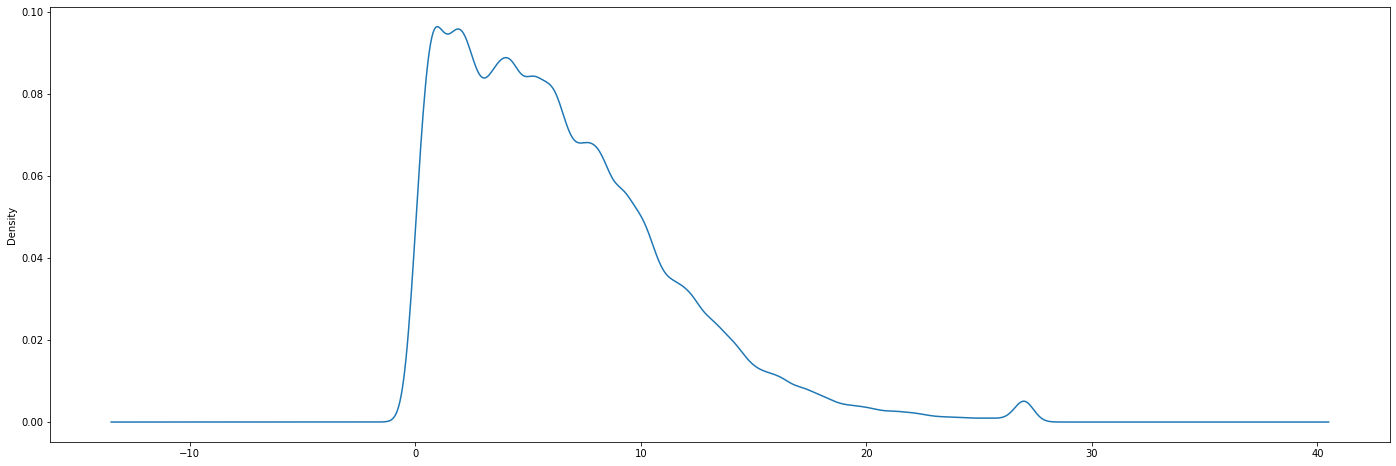

In [134]:

# Fix the Margin variables - is the same for 1 and 2
#df_train_raw['y_margin'] = df_base.apply(lambda x : 0 if x.position == '1' else 27 if x.Margin1 > 27 else x.Margin1, axis = 1) # capping at 99%ile of Margin1

df_train_raw['y_margin'].plot(kind = 'density', figsize = (24,8))


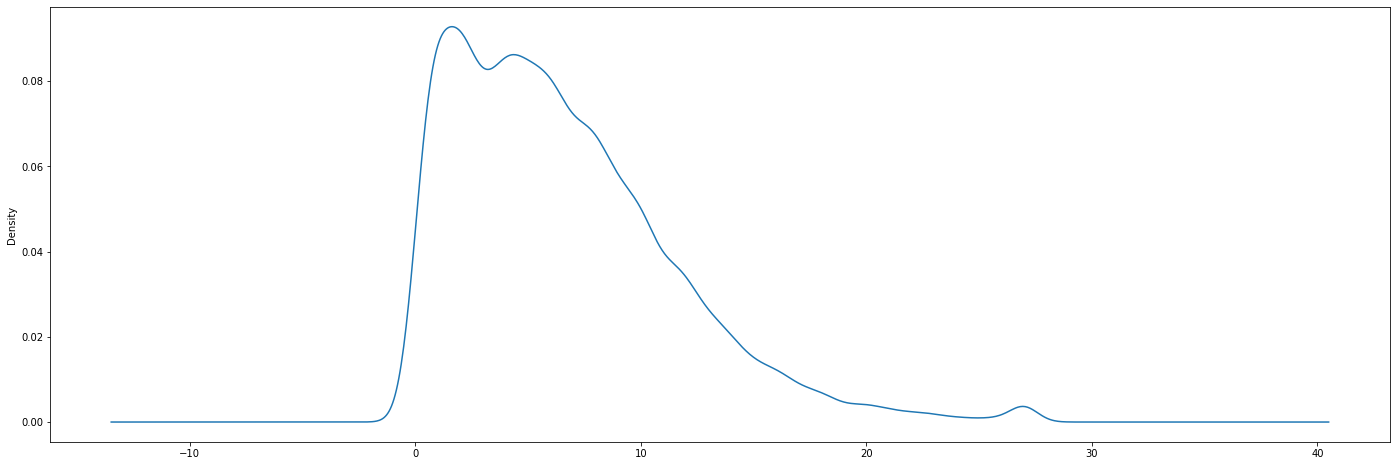

In [135]:

# Fix the Margin variables - is the same for 1 and 2
#df_train_raw['y_margin'] = df_base.apply(lambda x : 0 if x.position == '1' else 27 if x.Margin1 > 27 else x.Margin1, axis = 1) # capping at 99%ile of Margin1

df_test_raw['y_margin'].plot(kind = 'density', figsize = (24,8))


In [89]:
#!pip install --upgrade tensorflow

In [90]:
#!pip3 install keras --upgrade

In [136]:

print(datetime.now())

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Set random seed for reproducability
tf.random.set_seed(seed)

print(datetime.now())


2023-06-13 08:21:27.725152
2023-06-13 08:21:27.726811


In [137]:

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tf.__version__)

print(datetime.now())


Libraries imported.
Keras version: 2.3.0-tf
TensorFlow version: 2.2.0
2023-06-13 08:21:29.452742


In [138]:

# Creating Feature Normalisation

"""
#normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)

#normalizer.adapt(np.array(train_features))
normalizer.adapt(np.array(x_train))

print(normalizer.mean.numpy())
print()

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())
"""


"\n#normalizer = tf.keras.layers.Normalization(axis=-1)\nnormalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)\n\n#normalizer.adapt(np.array(train_features))\nnormalizer.adapt(np.array(x_train))\n\nprint(normalizer.mean.numpy())\nprint()\n\nfirst = np.array(train_features[:1])\n\nwith np.printoptions(precision=2, suppress=True):\n  print('First example:', first)\n  print()\n  print('Normalized:', normalizer(first).numpy())\n"

In [139]:

"""
def custom_loss(X1,X2):
    def loss(y_true,y_pred):
        # I don't have any values for y_true
        z = tf.math.add(X1,tf.math.multiply(X2,X2))
        return tf.math.square(tf.math.subtract(z,y_pred))
        # The "loss" should be [(X1+X2^2)-y_pred]^2
    return loss
    
def mean_weighted_bce_mse(y_true, y_prediction):
    # Binary crossentropy with weighting
    epsilon = 1e-12
    positive_weight = 4.108897148948174
    loss_positive = y_true * tf.math.log(y_prediction + epsilon)
    loss_negative = (1 - y_true) * tf.math.log(1 - y_prediction + epsilon)
    bce_loss = np.mean(tf.math.negative(positive_weight * loss_positive + loss_negative))
    
    # Mean squared error
    mse = tf.keras.losses.MeanSquaredError()
    mse_loss = mse(y_true, y_prediction)
 
    averaged_bce_mse = (bce_loss + mse_loss) / 2
    return tf.math.reduce_mean(averaged_bce_mse, axis=-1)


"""


'\ndef custom_loss(X1,X2):\n    def loss(y_true,y_pred):\n        # I don\'t have any values for y_true\n        z = tf.math.add(X1,tf.math.multiply(X2,X2))\n        return tf.math.square(tf.math.subtract(z,y_pred))\n        # The "loss" should be [(X1+X2^2)-y_pred]^2\n    return loss\n    \ndef mean_weighted_bce_mse(y_true, y_prediction):\n    # Binary crossentropy with weighting\n    epsilon = 1e-12\n    positive_weight = 4.108897148948174\n    loss_positive = y_true * tf.math.log(y_prediction + epsilon)\n    loss_negative = (1 - y_true) * tf.math.log(1 - y_prediction + epsilon)\n    bce_loss = np.mean(tf.math.negative(positive_weight * loss_positive + loss_negative))\n    \n    # Mean squared error\n    mse = tf.keras.losses.MeanSquaredError()\n    mse_loss = mse(y_true, y_prediction)\n \n    averaged_bce_mse = (bce_loss + mse_loss) / 2\n    return tf.math.reduce_mean(averaged_bce_mse, axis=-1)\n\n\n'

In [140]:

def rmse(y_true, y_pred):
    return K.sqrt( K.mean( K.square(y_pred - y_true) ) )

# The y_margin was capped at 27 (99%ile)
def race_loss(y_true, y_pred):
    from tensorflow.keras import backend as K
    race_loss = K.abs(y_true - y_pred) / (1 + y_true)
    return race_loss

def race_loss_fv1(y_true, y_pred):
    from tensorflow.keras import backend as K
    weight_factor = K.abs(1 - K.clip(y_true, 0, 27) / 27)
    #race_loss = K.abs(y_true - y_pred)/( 1 + y_true)
    #race_loss = weight_factor * K.abs(K.clip(y_true, 0, 27) - K.clip(y_pred, 0, 27))
    race_loss = weight_factor * K.abs(y_true - y_pred)
    return race_loss


In [141]:

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import backend as K
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError


In [142]:

import numpy as np 
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2),
                            self.metrics['val_' + metric],
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()
        


In [ ]:

print(datetime.now(local_tz))


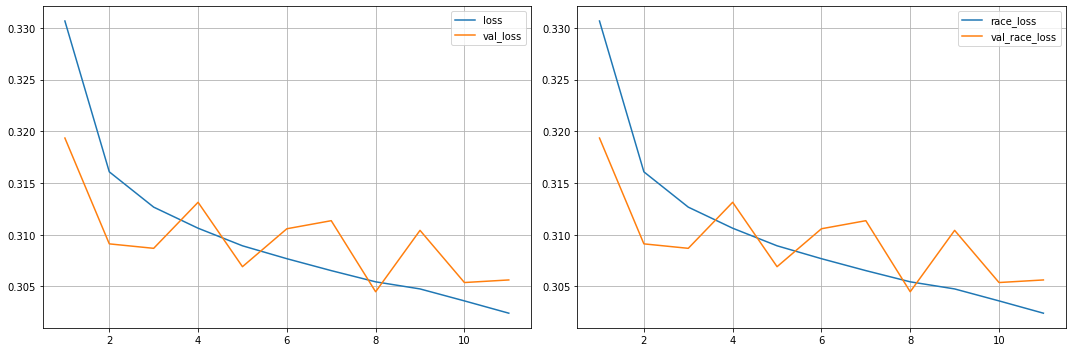

6545/6545 [==============================] - 426s 65ms/step - loss: 0.3024 - race_loss: 0.3024 - val_loss: 0.3056 - val_race_loss: 0.3056

2023-06-13 09:39:59.190265


In [143]:

try:
    del model_hyperopt
except NameError:
    pass

print(datetime.now(local_tz))
callbacks_list = [PlotLearning()]

from tensorflow.keras.initializers import glorot_uniform
kernel_initializer_var = glorot_uniform(seed=seed)

#model_hyperopt = Sequential([ Dense(2048, activation='relu'), Dense(1024, activation='relu'), Dense(512, activation='relu'), Dense(256, activation='relu'), Dense(128, activation='relu'), Dense(64, activation='relu'), Dense(1) ])
model_hyperopt = Sequential([ Dense(2048, activation='relu', kernel_initializer = kernel_initializer_var)\
                             , Dense(2048, activation='relu', kernel_initializer = kernel_initializer_var)\
                             , Dense(2048, activation='relu', kernel_initializer = kernel_initializer_var)\
                             , Dense(2048, activation='relu', kernel_initializer = kernel_initializer_var)\
                             , Dense(2048, activation='relu', kernel_initializer = kernel_initializer_var)\
                             , Dense(1, kernel_initializer= kernel_initializer_var) ])

#model_hyperopt.compile(loss = MeanSquaredError(), optimizer=Adam(), metrics=[ MeanSquaredError() ])
#model_hyperopt.compile(loss = MeanSquaredError(), optimizer = SGD(), metrics=[ MeanSquaredError() ])

#model_hyperopt.compile(loss = MeanAbsoluteError(), optimizer=Adam(), metrics=[ MeanAbsoluteError() ])
#model_hyperopt.compile(loss = race_loss_fv1, optimizer=Adam(), metrics=[race_loss_fv1] )
model_hyperopt.compile(loss = race_loss, optimizer=Adam(), metrics=[race_loss] )

#model_hyperopt.compile(loss = race_loss, optimizer=Adam())
#model_hyperopt.compile(loss=rmse, optimizer=Adam(), metrics=[rmse] )

model_hyperopt.fit(x_train, y_train
          , epochs = 11
          ,  validation_data=(x_test, y_test)
          #, verbose=1
          #, shuffle=True
          ,callbacks=callbacks_list)

print()
print(datetime.now(local_tz))



In [ ]:

print(datetime.now(local_tz))
# approx 6 min per epoch X 11 epoch(s) equals about an hour


In [144]:

gc.collect()


62778

In [ ]:
print(datetime.now(local_tz))

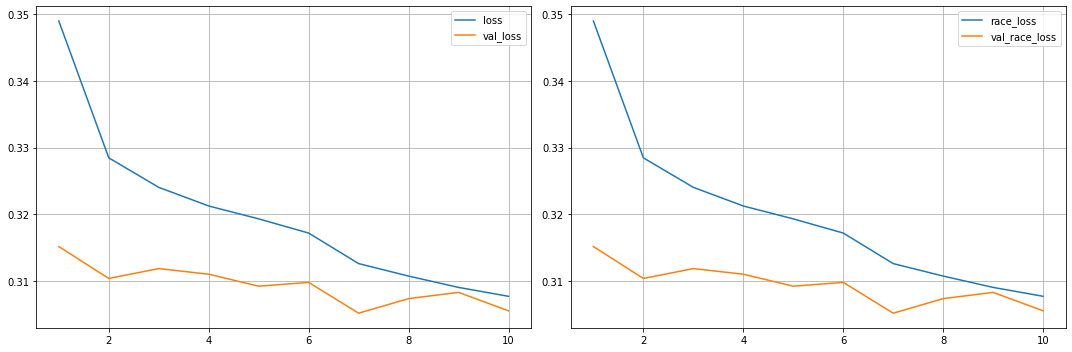

6545/6545 [==============================] - 56s 9ms/step - loss: 0.3077 - race_loss: 0.3077 - val_loss: 0.3055 - val_race_loss: 0.3055 - lr: 6.0653e-04


In [152]:

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

try:
    del model_hyperopt_v2
except NameError:
    pass

#print(datetime.now(local_tz))
#print()
callbacks_list = [PlotLearning(), EarlyStopping(patience=3)]

def create_model():
    model = Sequential([
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

model_hyperopt_v2 = create_model()

def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callbacks_list.append(LearningRateScheduler(scheduler))

#model_hyperopt_v2.compile(loss = race_loss_fv1, optimizer=Adam(), metrics=[race_loss_fv1] )
model_hyperopt_v2.compile(loss = race_loss, optimizer=Adam(), metrics=[race_loss] )

model_hyperopt_v2.fit(x_train, y_train
          , epochs = 11
          , validation_data=(x_test, y_test)
          , verbose=1
          , shuffle=True
          ,callbacks=callbacks_list)

#print()
#print(datetime.now(local_tz))


In [153]:

print(datetime.now(local_tz)) # started at 3 32PM
# Estimated 1 min per epoch ~10min runtime


2023-06-13 15:41:51.992537+05:30


In [157]:
x_train.shape

(209430, 75)

In [160]:

#exp_model_nm = f'm_{todaydt}_cgpt_raceloss_batchnorm_e11.h5'
exp_model_nm = f'm_{todaydt}_cgpt_raceloss_batchnorm_e11.ckpt'

model_hyperopt_v2.save_weights(f'{modelloc}//{exp_model_nm}')


In [161]:
print(exp_model_nm)

m_2023-06-13_cgpt_raceloss_batchnorm_e11.ckpt


In [ ]:

del model_hyperopt

gc.collect()


In [ ]:

ms = model.summary()

print(ms)


stringlist = []
model.summary(print_fn = lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)
print(short_model_summary)

print(dir(model.loss))

print(model.loss.__name__)

ms_config = model.get_config()

ms_name = ms_config['name']
ms_num_layers = len(ms_config['layers'])

#ms_config

#ms_config['name']
#print(type(ms_config['layers']))

ms_loss = model.loss.__name__
ms_optimizer = model.optimizer._name

#print(model.optimizer._name)
#print(model.loss.__name__)

In [ ]:

#print(dir(ms))

"""
['__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']

"""

#print(dir(model.loss))

"""
['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
"""

#print(dir(model.optimizer))

"""
['_HAS_AGGREGATE_GRAD', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_add_variable_with_custom_getter', '_aggregate_gradients', '_assert_valid_dtypes', '_call_if_callable', '_checkpoint_dependencies', '_clip_gradients', '_compute_gradients', '_create_all_weights', '_create_hypers', '_create_or_restore_slot_variable', '_create_slots', '_decayed_lr', '_deferred_dependencies', '_deferred_slot_restorations', '_dense_apply_args', '_distributed_apply', '_fallback_apply_state', '_gather_saveables_for_checkpoint', '_get_hyper', '_handle_deferred_dependencies', '_hyper', '_hypers_created', '_init_set_name', '_initial_decay', '_iterations', '_keras_api_names', '_keras_api_names_v1', '_list_extra_dependencies_for_serialization', '_list_functions_for_serialization', '_lookup_dependency', '_maybe_initialize_trackable', '_name', '_name_based_attribute_restore', '_name_based_restores', '_no_dependency', '_object_identifier', '_preload_simple_restoration', '_prepare', '_prepare_local', '_resource_apply_dense', '_resource_apply_sparse', '_resource_apply_sparse_duplicate_indices', '_resource_scatter_add', '_resource_scatter_update', '_restore_from_checkpoint_position', '_restore_slot_variable', '_self_name_based_restores', '_self_setattr_tracking', '_self_unconditional_checkpoint_dependencies', '_self_unconditional_deferred_dependencies', '_self_unconditional_dependency_names', '_self_update_uid', '_serialize_hyperparameter', '_set_hyper', '_setattr_tracking', '_single_restoration_from_checkpoint_position', '_slot_names', '_slots', '_sparse_apply_args', '_track_trackable', '_tracking_metadata', '_unconditional_checkpoint_dependencies', '_unconditional_dependency_names', '_update_uid', '_use_locking', '_valid_dtypes', '_weights', 'add_slot', 'add_weight', 'amsgrad', 'apply_gradients', 'clipnorm', 'clipvalue', 'epsilon', 'from_config', 'get_config', 'get_gradients', 'get_slot', 'get_slot_names', 'get_updates', 'get_weights', 'iterations', 'minimize', 'set_weights', 'variables', 'weights']
"""


In [163]:

model_for_predictions = create_model()  # Create a new instance of your model
model_for_predictions.build(input_shape = (209430, 75) )

#model_for_predictions.load_weights(f'{modelloc}//m_2023-06-13_cgpt_raceloss_batchnorm_e11.ckpt', compile = False)
model_for_predictions.load_weights(f'{modelloc}//m_2023-06-13_cgpt_raceloss_batchnorm_e11.ckpt')


NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Model//m_2023-06-13_cgpt_raceloss_batchnorm_e11.ckpt

In [ ]:

predictions_train = model.predict(x_train)
predictions_train = np.ravel(predictions_train)

predictions_test = model.predict(x_test)
predictions_test = np.ravel(predictions_test)


In [ ]:
# Getting the output dataset together

df_train_raw['preds'] = predictions_train
df_test_raw['preds'] = predictions_test

df_master = df_train_raw.append(df_test_raw)
print()

print(df_master.shape)
print()

print(df_master.columns.values.tolist())
print()


In [ ]:

df_train_raw['preds'].plot( kind='density', legend=True, figsize = (24,8) )


In [ ]:

df_test_raw['preds'].plot( kind='density', legend=True, figsize = (24,8) )


In [ ]:

#pd.DataFrame(df_test['preds'].value_counts()).head()
#pd.DataFrame(df_test['preds'].value_counts()).shape


#### Creating Model ID for reference in evaluation 

In [ ]:

print(time.time()/60)
print(int(time.time()/60))

mid = int(time.time()/60)
#mid = str(datetime.now())
print(mid)


In [ ]:

#del model_chars
model_chars = pd.DataFrame(columns = ['Mid','y','feat', 'name', 'layers', 'cfg', 'loss', 'optimizer'])
rowlist = [ mid, label, features, ms_name, ms_num_layers, ms_config, ms_loss, ms_optimizer  ]

model_chars.loc[ len(model_chars) ] = rowlist 


In [ ]:

model_chars.head()


In [ ]:

# Run this if new variable has been added
#model_chars.to_csv(f'{fileloc}/model_chars_master.csv', index = False)


In [ ]:

# List that we want to add as a new row
#List = [6, 'William', 5532, 1, 'UAE']
row_to_append = rowlist

# Open our existing CSV file in append mode
# Create a file object for this file
with open(f"{fileloc}/model_chars_master.csv", 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(row_to_append)
 
    # Close the file object
    f_object.close()


#### Preparing the Datset for Export

In [ ]:

print(datetime.now())


In [ ]:

print(mid)


In [ ]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_for_drop = ['year','qtr']
cols_for_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag','preds']

todaydt = datetime.now().date()
pred_exp_fname = f"predictions_dataset_{mid}_{todaydt}.csv"

exp_pred_ds = df_master[cols_for_keep]
exp_pred_ds.loc[:,'mid'] = mid



##### 3 Minute Export Time

In [ ]:

print(datetime.now())


In [ ]:

exp_pred_ds.to_csv(f'{fileloc}/{pred_exp_fname}', index = False)


In [ ]:

print(datetime.now())


In [ ]:

display(exp_pred_ds.head())
